# A Machine Learning Approach to Classifying a Breast Cancer Tumour as Benign or Malignant

The dataset is from the public dataset owned by M Yasser H which provides a classification of tumours as either malignant (cancerous) or benign (non cancerous).

With breast cancer now being the most common cancer amoungst women in the world it is becoming evermore vital that medical professionals are able to accurately predict the type of tumour a person may have.

### An overview of the dataset 

In [5]:
#import libraries
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix
from sklearn.metrics import fbeta_score, make_scorer
from sklearn.model_selection import GridSearchCV
from seaborn import heatmap
from sklearn.metrics import accuracy_score
import os 
import joblib

import warnings #ignoring deprecated warning messages
warnings.filterwarnings("ignore", category=FutureWarning)

In [6]:
df = pd.read_csv('/Users/heatherbermann/Documents/machinelearningdataset1.csv')

df #an overveiw of the dataset

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [7]:
df.shape 
print("The dataset has " + str(df.shape[1]) + " features and " + str(df.shape[0]) + " rows.")

The dataset has 32 features and 569 rows.


A general rule of thumb is that there should be at least 10 times more rows than features to create a good classification model dataset. It is important to have a well populated feature space to avoid the curse of dimensionality. This is because as dimensionality increases (the number of features) more data points are needed for a good performance - infact the number of needed data points increases exponentially.

This dataset has good ratio of features to rows to create a reliable classification model.

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

The dataset has no null or blank values.

<AxesSubplot: xlabel='diagnosis', ylabel='count'>

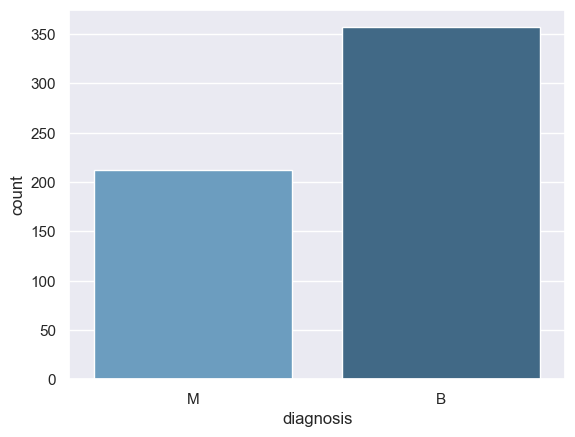

In [9]:
sns.set(font_scale=1)
sns.countplot(x='diagnosis',data=df ,palette='Blues_d') #compare number of M cases to B cases

The dataset is clearly skewed towards benign tumours. The model might overfit to the benign class as it's represented more in the dataset.

<AxesSubplot: >

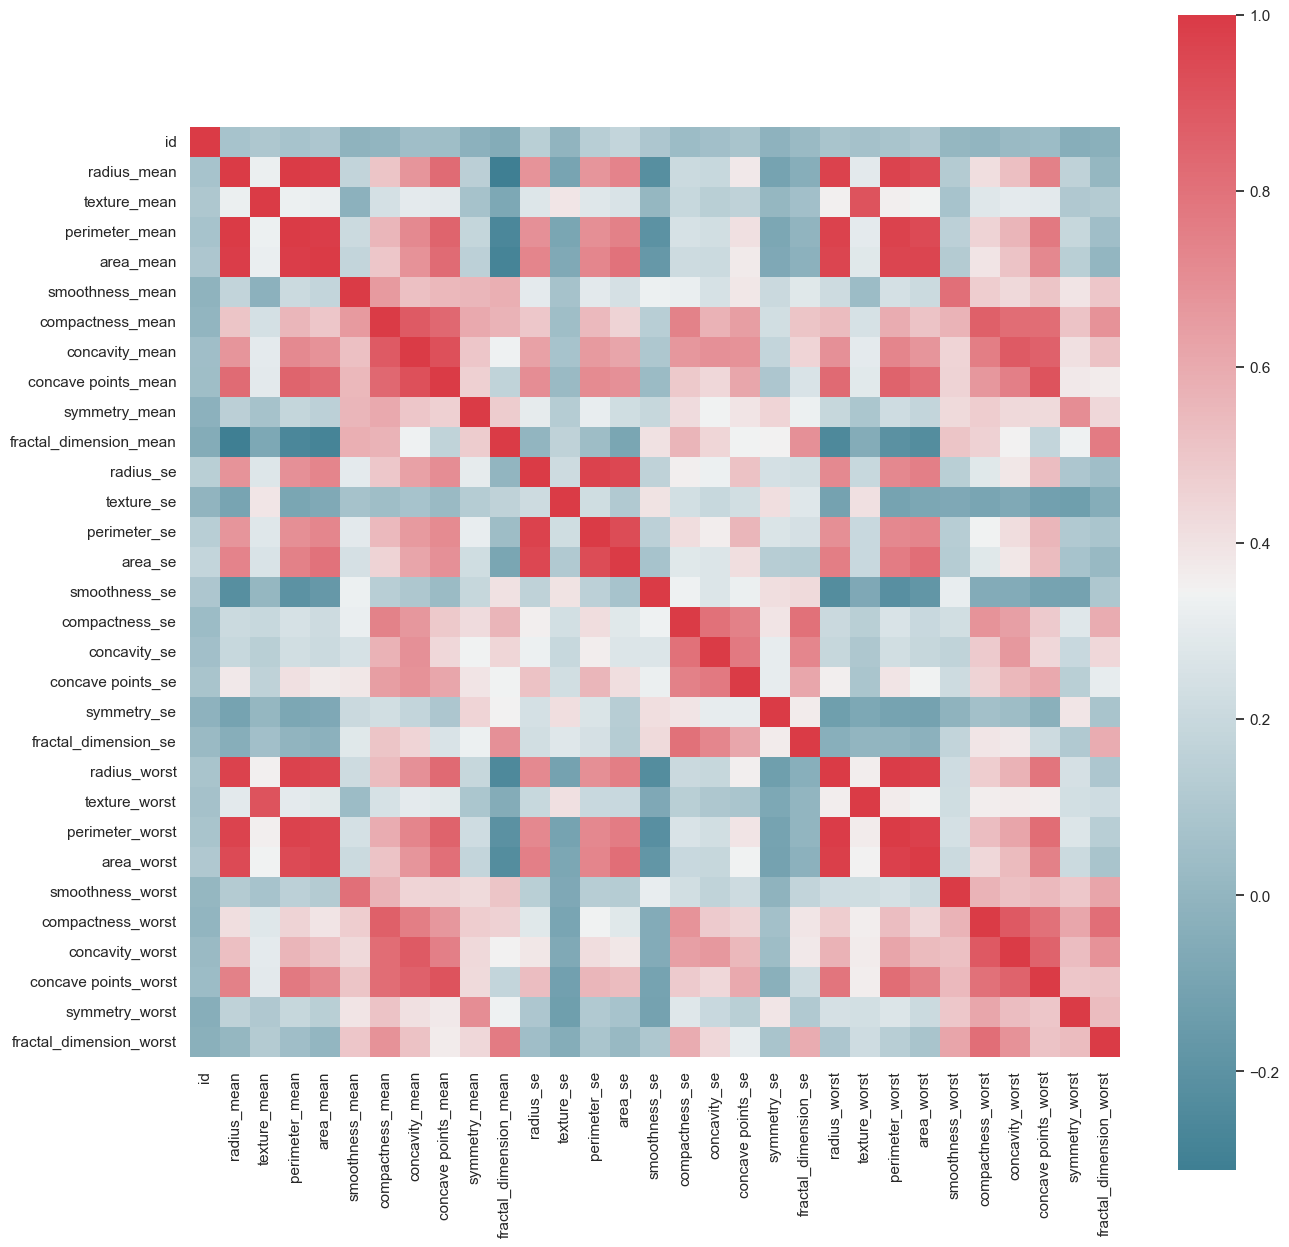

In [10]:
corr = df.corr()
f,ax=plt.subplots(figsize=(15,15))
sns.heatmap(corr,mask=np.zeros_like(corr, dtype=bool),cmap=sns.diverging_palette(220, 10, as_cmap=True), square=True, ax=ax)

From this heatmap we can see which features appear to have the highest correlation - of course correlation doesn't always equal causation but it can give a clue to which features are of greater importance to the model.

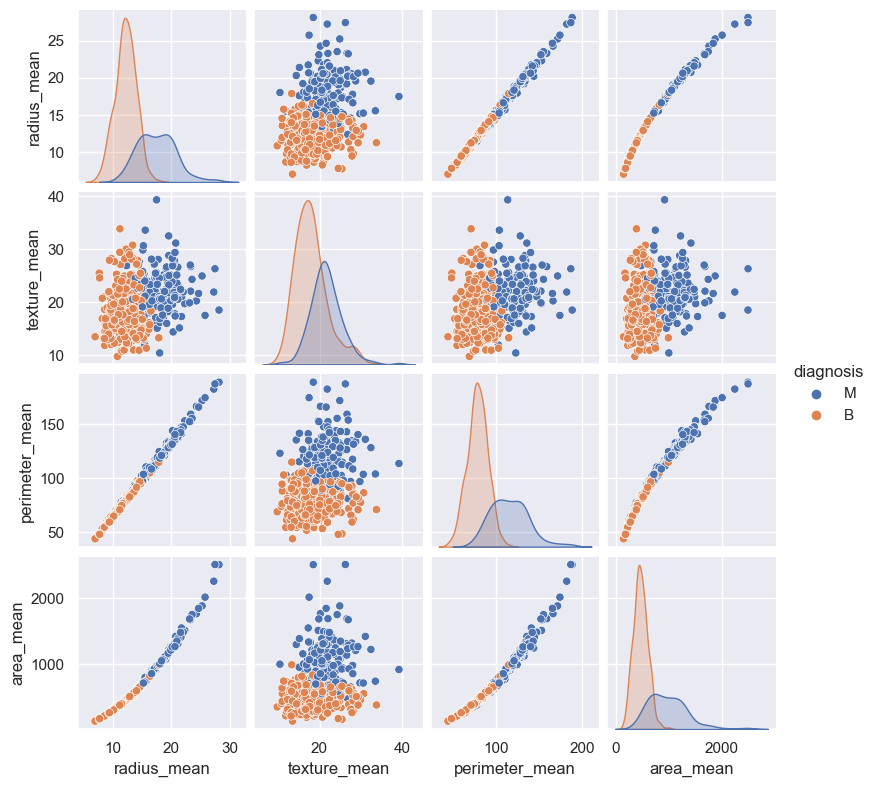

In [11]:
sns.pairplot(df, hue="diagnosis", vars=["radius_mean", "texture_mean", "perimeter_mean", "area_mean"], height = 2)

plt.show()

This matrix of graphs shows the relationships between the mean radius, texture, perimeter and area of the tumours. The hue shows the grouping of either M (malignant) or B (benign) tumours. These features were chosen as they appeared to have a high correlation.

Malignant tumours appear to have a larger mean radius, perimeter and area as well as having more texture.

The differences between M and B cases are visible for all of these chosen features with very little noise in the data. This means these features can be used to help accurately predict if a tumour is malignant or benign.

### Preprocessing the data

In [42]:
df['diagnosis']=LabelEncoder().fit_transform(df.diagnosis) #converting M and B into boolean/binary variables of 1 and 0
df.drop('id', inplace=True, axis=1) #remove the id column as this isn't needed

df

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,1,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [13]:
df_features = df.drop(["diagnosis"], axis=1) #splitting the dataset
df_target = df["diagnosis"]
                          
X_train, X_test, y_train, y_test = train_test_split(df_features, df_target, test_size=0.25, random_state=0)

print("X_train.shape = ", X_train.shape)
print("X_test.shape = ", X_test.shape)
print("y_train.shape = ", y_train.shape)
print("y_test.shape = ", y_test.shape)                         

X_train.shape =  (426, 31)
X_test.shape =  (143, 31)
y_train.shape =  (426,)
y_test.shape =  (143,)


The data is split into a training and testing dataset. The target column (diagnosis) was dropped prior to avoid data leaking into the training dataset.

In [14]:
scaler = StandardScaler() #standardize features by removing the mean and scaling to unit variance

normalised_X_train = pd.DataFrame(scaler.fit_transform(X_train), columns = X_train.columns)
normalised_X_test = pd.DataFrame(scaler.transform(X_test), columns = X_test.columns)

joblib.dump(scaler, 'Scaler.joblib')

['Scaler.joblib']

### Random Forest Model: Base Model

In [15]:
rf = RandomForestClassifier(n_estimators = 10) #start with 10 decision trees
sel = SelectFromModel(rf)

rf.fit(X_train, y_train)

y_pred10 = rf.predict(X_test) #prediction of the test results
print('Model accuracy score with 10 decision-trees : {0:0.4f}'. format(accuracy_score(y_test, y_pred10)))


sel.get_support()
selected_feat= X_train.columns[(sel.get_support())]
len(selected_feat)
print("The selected features are " + str(selected_feat))


Model accuracy score with 10 decision-trees : 0.9510
The selected features are Index(['perimeter_mean', 'concavity_mean', 'concave points_mean', 'radius_se',
       'radius_worst', 'perimeter_worst', 'compactness_worst',
       'concave points_worst'],
      dtype='object')


In [16]:
rf = RandomForestClassifier(n_estimators = 100) # rf with 100 decision trees
sel = SelectFromModel(rf)

rf.fit(X_train, y_train)

y_pred = rf.predict(X_test) #prediction of the test results
print('Model accuracy score with 100 decision-trees : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))


sel.get_support()
selected_feat= X_train.columns[(sel.get_support())]
len(selected_feat)
print("The selected features are " + str(selected_feat))


Model accuracy score with 100 decision-trees : 0.9650
The selected features are Index(['perimeter_mean', 'concavity_mean', 'concave points_mean', 'area_se',
       'radius_worst', 'perimeter_worst', 'area_worst', 'concavity_worst',
       'concave points_worst'],
      dtype='object')


Text(90.74999999999999, 0.5, 'Predicted')

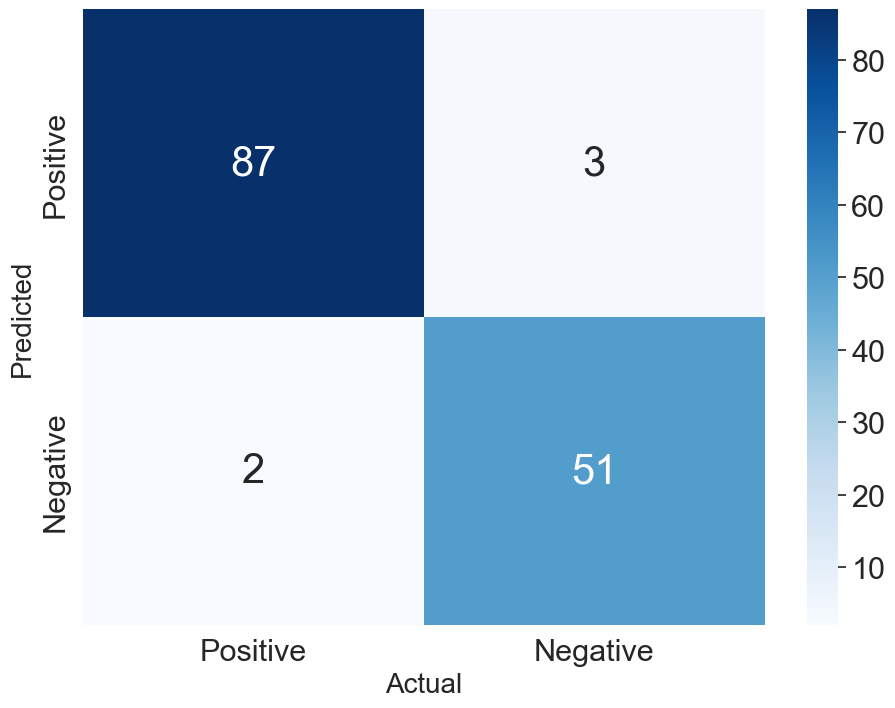

In [13]:
confusion_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(11,8))
sns.set(font_scale=2)

heatmap(confusion_matrix, annot=True, annot_kws={"size": 30}, fmt='g',cmap='Blues',xticklabels=['Positive', 'Negative'],yticklabels=['Positive', 'Negative'])

plt.xlabel('Actual', fontsize=20)
plt.ylabel('Predicted', fontsize=20)

In [17]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.97      0.97        90
           1       0.94      0.96      0.95        53

    accuracy                           0.97       143
   macro avg       0.96      0.96      0.96       143
weighted avg       0.97      0.97      0.97       143



Without even tuning the hyperparameters the model has already achieved an accuracy score of 0.965 with 10 trees and 0.972 with 100 trees.

### Hyperparameter Tuning

The hyperparameters I want to tune for this random forest classification are n_estimators (number of trees), max_features (max number of features considered for splitting a node) and the max_depth (max depth of the individual decision trees).

The data will be tuned k-fold cross validation.

In [40]:
random_grid = {'n_estimators': [30,50,75,100], #setting the tuning parameters - all will be tested
               'max_features': [10,20,75 ,50],
               'max_depth': [5,8,10,20,50]}

rf_hp = RandomForestClassifier() 

rf_random = RandomizedSearchCV(estimator = rf,param_distributions = random_grid, n_iter = 80, cv = 5, verbose=1, random_state=35, n_jobs = -1)

rf_random.fit(X_train, y_train)

Fitting 5 folds for each of 80 candidates, totalling 400 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=80,
                   n_jobs=-1,
                   param_distributions={'max_depth': [5, 8, 10, 20, 50],
                                        'max_features': [10, 20, 75, 50],
                                        'n_estimators': [30, 50, 75, 100]},
                   random_state=35, verbose=1)

In [35]:
print ('The random grid was ', random_grid, '\n') # print the best parameters
print ('The best parameters are ', rf_random.best_params_, ' \n')

The random grid was  {'n_estimators': [30, 50, 75, 100], 'max_features': [10, 20, 75, 50], 'max_depth': [5, 8, 10, 20, 50]} 

The best parameters are  {'n_estimators': 50, 'max_features': 10, 'max_depth': 5}  



In [36]:
rf_hp = RandomForestClassifier(n_estimators = 30,  max_features = 10, max_depth= 8) #using the tuned hyperparameter
rf_hp.fit( X_train, y_train) 


RandomForestClassifier(max_depth=8, max_features=10, n_estimators=30)

In [37]:
y_pred_hp = rf_hp.predict(X_test)
sel_hp = SelectFromModel(rf_hp)

print('Model accuracy score with tuned hyperparameters is: {0:0.4f}'. format(accuracy_score(y_test, y_pred_hp)))

sel_hp.get_support()
selected_feat_hp= X_train.columns[(sel_hp.get_support())]
len(selected_feat)
print("The selected features are " + str(selected_feat_hp))

Model accuracy score with tuned hyperparameters is: 0.9860
The selected features are Index(['concavity_mean', 'concave points_mean', 'area_se', 'radius_worst',
       'perimeter_worst', 'area_worst', 'concave points_worst'],
      dtype='object')


In [38]:
print(classification_report(y_test, y_pred_hp))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99        90
           1       0.98      0.98      0.98        53

    accuracy                           0.99       143
   macro avg       0.99      0.99      0.99       143
weighted avg       0.99      0.99      0.99       143



I used a random grid search to tune the hyperparameters - due to this being an exhausting algorithm it is slow but does return an optimal result. The tuned hyperparameters have increased to accuracy score to 0.99 (2sf). 

Text(90.74999999999999, 0.5, 'Predicted')

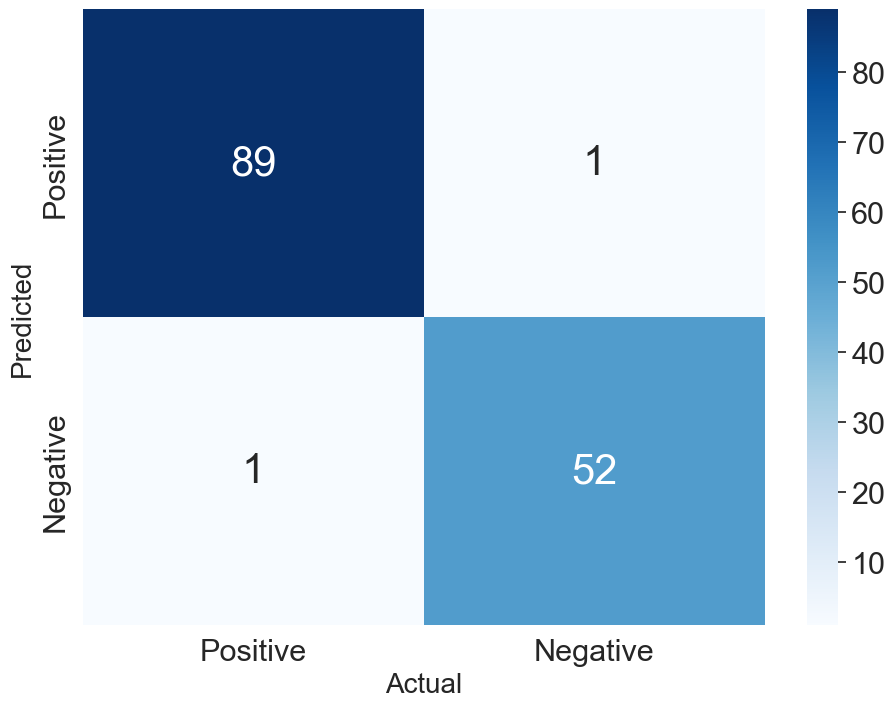

In [41]:
confusion_matrix_hp = confusion_matrix(y_test, y_pred_hp)

plt.figure(figsize=(11,8))
sns.set(font_scale=2)

heatmap(confusion_matrix_hp, annot=True, annot_kws={"size": 30}, fmt='g',cmap='Blues',xticklabels=['Positive', 'Negative'],yticklabels=['Positive', 'Negative'])

plt.xlabel('Actual', fontsize=20)
plt.ylabel('Predicted', fontsize=20)

There are also less false negatives and false positives after tuning hyperparameters.

### Conclusions

 This classification model has a very high accuracy score as the original dataset was linearly separable with little noise. Even so, tuning the hyperparameters increased the accuracy even further.